1)1- a)

In [1]:
!pip install --upgrade gensim

In [2]:
import numpy as np
import gensim.downloader as api
from numpy.linalg import norm

wv = api.load('glove-twitter-50')

words = ['dog','bark','tree','bank','river','money']


[==================================================] 100.0% 199.5/199.5MB downloaded


In [3]:
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return dot_product / (norm_A * norm_B)

In [4]:
cos_similarity = np.zeros((len(words),len(words)))
for i in range(len(words)):
    for j in range(len(words)):
        A = wv[words[i]]
        B = wv[words[j]]
        cos_similarity[i, j] = cosine_similarity(A, B)
print(cos_similarity)


[[1.         0.59377939 0.71375066 0.34823629 0.40120098 0.5751335 ]
 [0.59377939 1.         0.54587328 0.04010864 0.26663467 0.29098499]
 [0.71375066 0.54587328 1.         0.34945628 0.4871158  0.51008105]
 [0.34823629 0.04010864 0.34945628 1.         0.31992203 0.67465627]
 [0.40120098 0.26663467 0.4871158  0.31992203 1.         0.33779964]
 [0.5751335  0.29098499 0.51008105 0.67465627 0.33779964 0.99999988]]


b)

In [ ]:
from gensim.models import FastText
words = ['dog','bark','tree','bank','river','money']
model = FastText(vector_size=50, window=5, min_count=1, sentences=words, epochs=10)

cos_similarity_FT = np.zeros((len(words),len(words)))
for i in range(len(words)):
    for j in range(len(words)):
        A = model.wv[words[i]]
        B = model.wv[words[j]]
        cos_similarity_FT[i, j] = cosine_similarity(A, B)
print(cos_similarity_FT)

[[ 0.99999988  0.10783223 -0.16999218  0.03131566 -0.01347245 -0.11124042]
 [ 0.10783223  1.          0.20756482  0.16962697  0.08666061 -0.0467676 ]
 [-0.16999218  0.20756482  1.          0.03565013  0.06526411 -0.26308936]
 [ 0.03131566  0.16962697  0.03565013  0.99999988  0.20329587 -0.01642046]
 [-0.01347245  0.08666061  0.06526411  0.20329587  1.         -0.12267807]
 [-0.11124042 -0.0467676  -0.26308936 -0.01642046 -0.12267807  1.        ]]


c) The first model capstures the semantics better because looking at the cosine similarity matrixes we have that:
- Dog and Bark: in the first model have 0.59 similarity and in the second one only 0.10.
- Bank and Money: in the first model have 0.67 and in the second one  -0.016.
We can see that words with closer relationship have a better cosine similarity in the first model.

1)-2)

In [ ]:
import nltk
import pandas as pd
import json
from sklearn.model_selection import train_test_split

nltk.download('twitter_samples')

file_path = '/root/nltk_data/corpora/twitter_samples/negative_tweets.json'

# Read the file line by line and parse each line as JSON
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

neg = pd.DataFrame(data)

# Positive tweets
file_path = '/root/nltk_data/corpora/twitter_samples/positive_tweets.json'

# Read the file line by line and parse each line as JSON
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

pos = pd.DataFrame(data)

pos['sentiment'] = 'positive'
neg['sentiment'] = 'negative'

# Combine them
df = pd.concat([pos, neg], ignore_index=True)


# Split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=99)

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


b)

In [ ]:
def create_ngrams(data,n):
  ngrams_list = []
  for sentence in data:
   words = sentence.split()
   sentence_ngrams = list(ngrams(words, n))
   ngrams_list.append(sentence_ngrams)

  return ngrams_list


In [ ]:

unigram = create_ngrams(x_train,1)
bigram = create_ngrams(x_train,2)
trigram = create_ngrams(x_train,3)
fourgram = create_ngrams(x_train,4)

c)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy_plot = []
for i in range(1,5):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(i, i))
  x_gram = vectorizer.fit_transform(x_train)
  x_test_gram = vectorizer.transform(x_test)

  log_reg = LogisticRegression()
  log_reg.fit(x_gram, y_train)
  y_pred = log_reg.predict(x_test_gram)

  accuracy = accuracy_score(y_test, y_pred)
  accuracy_plot.append(accuracy)
  print(f'Accuracy for {i}-grams: {accuracy}')

vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 4))
x_gram = vectorizer.fit_transform(x_train)
x_test_gram = vectorizer.transform(x_test)

log_reg = LogisticRegression()
log_reg.fit(x_gram, y_train)
y_pred = log_reg.predict(x_test_gram)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for 1to4-grams: {accuracy}')

Accuracy for 1-grams: 0.761
Accuracy for 2-grams: 0.6846666666666666
Accuracy for 3-grams: 0.606
Accuracy for 4-grams: 0.5753333333333334
Accuracy for 1to4-grams: 0.7663333333333333


d) As the ngrams become bigger we lose accuracy. However, if we use all of the grams (from one to four) we get the best result for accuracy.

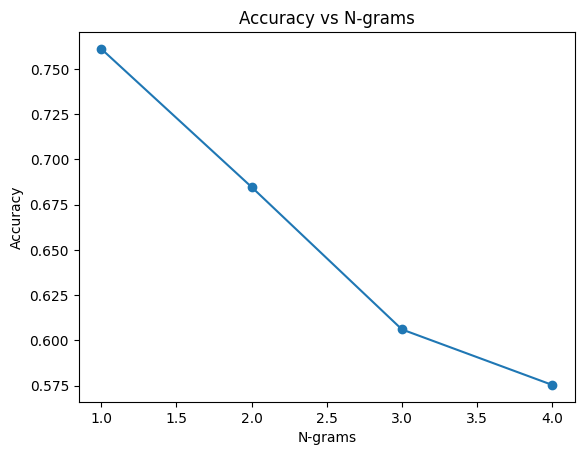

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 5), accuracy_plot, marker='o')
plt.xlabel('N-grams')
plt.ylabel('Accuracy')
plt.title('Accuracy vs N-grams')
plt.show()

2) (Note: I run out of free GPU/TPU Google usage, so I wasn't able to run big models nor per a lot of epochs. I run the models and saved them to later load them again because my colab was unstable)

In [ ]:
#!pip install numpy==1.26.4  pyyaml

In [ ]:
!pip install transformers datasets evaluate tensorflow --quiet

In [ ]:
from datasets import load_dataset
import numpy as np

billsum = load_dataset('billsum', split='ca_test')
billsum = billsum.train_test_split(test_size=0.2) #data split
print(billsum)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 989
    })
    test: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 248
    })
})


In [ ]:
print(billsum['train']['text'][0])
print(billsum['train']['summary'][0])

The people of the State of California do enact as follows:


SECTION 1.
Chapter 3.132 (commencing with Section 15820.94) is added to Part 10b of Division 3 of Title 2 of the Government Code, to read:
CHAPTER  3.132. Financing of Adult Local Criminal Justice Facilities - 2016
15820.94.
(a) For purposes of this chapter, “participating county” means a county, city and county, or regional consortium of counties, within the state that has been certified to the State Public Works Board (board) by the Board of State and Community Corrections (BSCC) as having satisfied all of the requirements set forth in this chapter for financing an adult local criminal justice facility pursuant to this chapter.
(b) (1) For purposes of this chapter, an adult local criminal justice facility may include improved housing with an emphasis on expanding program and treatment space as necessary to manage the adult offender population under the jurisdiction of the sheriff or county department of corrections, as may 

2)2)

In [ ]:
import numpy as np

# Prepare the data
input_texts_train = billsum['train']['text']
target_texts_train = [" starttoken "+seq+" endtoken " for seq in billsum['train']['summary']]

input_texts_test = billsum['test']['text']
target_texts_test = [" starttoken "+seq+" endtoken " for seq in billsum['test']['summary']]


In [ ]:
max_input_len = 3000
max_target_len = 1000
#it was decided to truncate the sentences due to lack of memory

In [ ]:
# Tokenize the text to get the vocab count
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_tokenizer(texts,thresh=5): #thresh determines the rare words
    tokenizer = Tokenizer(oov_token="<OOV>")
    tokenizer.fit_on_texts(texts)
    # Filter out rare words (to better predictions and to save memory)
    cnt = 0
    tot_cnt = 0
    for key, value in tokenizer.word_counts.items():
        tot_cnt = tot_cnt + 1
        if value < thresh:
            cnt = cnt + 1
    print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)
    # Re-do the tokenizer on training data adding a max number of words
    tokenizer = Tokenizer(oov_token="<OOV>", num_words=tot_cnt-cnt)
    tokenizer.fit_on_texts(texts)
    return tokenizer

In [ ]:

# Prepare a tokenizer on training data
input_tokenizer_train = get_tokenizer(input_texts_train,thresh=10)
target_tokenizer_train = get_tokenizer(target_texts_train,thresh=5)

# Convert text sequences to integer sequences
input_seq_train = input_tokenizer_train.texts_to_sequences(input_texts_train)
input_seq_test = input_tokenizer_train.texts_to_sequences(input_texts_test)

target_seq_train = target_tokenizer_train.texts_to_sequences(target_texts_train)
target_seq_test = target_tokenizer_train.texts_to_sequences(target_texts_test)


% of rare words in vocabulary:  72.27361452940677
% of rare words in vocabulary:  56.0595567867036


In [ ]:

# Pad zero upto maximum length
encoder_input_data_train = pad_sequences(input_seq_train,  maxlen=max_input_len, padding='post')
encoder_input_data_test = pad_sequences(input_seq_test, maxlen=max_input_len, padding='post')

# Size of vocabulary (+1 for padding token)
input_vocabulary = input_tokenizer_train.num_words + 1
print("Size of input vocabulary:",input_vocabulary)
# Same for target data
# Pad zero upto maximum length
decoder_input_data_train = pad_sequences(target_seq_train, maxlen=max_target_len, padding='post')
decoder_input_data_test = pad_sequences(target_seq_test, maxlen=max_target_len, padding='post')

decoder_target_data_train = decoder_input_data_train[:, 1:]
decoder_target_data_test = decoder_input_data_test[:, 1:]
decoder_input_data_train = decoder_input_data_train[:, :-1]
decoder_input_data_test = decoder_input_data_test[:, :-1]

# Size of vocabulary (+1 for padding token)
target_vocabulary = target_tokenizer_train.num_words + 1
print("Size of target vocabulary:",target_vocabulary)

Size of input vocabulary: 6535
Size of target vocabulary: 3808


In [ ]:
print(encoder_input_data_train,len(encoder_input_data_train[0]))

[[   2  153    3 ...    0    0    0]
 [   2  153    3 ...    0    0    0]
 [   2  153    3 ...    0    0    0]
 ...
 [   2  153    3 ...    0    0    0]
 [   2  153    3 ...    0    0    0]
 [1649    4  974 ...    2   34  252]] 3000


In [ ]:
print(decoder_input_data_train,len(decoder_input_data_train[0]))
print(decoder_target_data_train,len(decoder_target_data_train[0]))

[[ 44   2 245 ...   0   0   0]
 [ 44  18  14 ...   0   0   0]
 [ 44  18 102 ...   0   0   0]
 ...
 [ 44  48  18 ...   0   0   0]
 [ 44   2  33 ...   0   0   0]
 [ 44  36 158 ...   0   0   0]] 2499
[[  2 245  86 ...   0   0   0]
 [ 18  14  26 ...   0   0   0]
 [ 18 102  14 ...   0   0   0]
 ...
 [ 48  18  14 ...   0   0   0]
 [  2  33   1 ...   0   0   0]
 [ 36 158  14 ...   0   0   0]] 2499


In [ ]:
#Build the model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model

latent_dim = 16
embedding_dim = 16

# Encoder
encoder_inputs = Input(shape=(max_input_len, ))

# Embedding layer
enc_emb = Embedding(input_vocabulary, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm1(enc_emb)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(target_vocabulary, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(target_vocabulary, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 3000)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_19            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 3000, 16)       │        104,768 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 16)       │         42,208 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ [(None, 3000, 16),     │          2,112 │ embedding_6[0][0]      │
│                           │ (None, 16), (None,     │                │                        │
│                           │ 16)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_7[0][0],     │
│                           │ (None, 16), (None,     │                │ lstm_6[0][1],          │
│                           │ 16)]                   │                │ lstm_6[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2        │ (None, None, 2638)     │         44,846 │ lstm_7[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 196,046 (765.80 KB)

 Trainable params: 196,046 (765.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(encoder_input_data_train.shape, decoder_input_data_train.shape, decoder_target_data_train.shape
)
print(input_vocabulary, target_vocabulary
)

(989, 3000) (989, 999) (989, 999)
6559 2597


In [ ]:
encoder_input_data_train = encoder_input_data_train.astype('int16') #to save memory
decoder_input_data_train = decoder_input_data_train.astype('int16')

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


model.fit(
    [encoder_input_data_train[0:10], decoder_input_data_train[0:10]],
    decoder_target_data_train[0:10],
    batch_size=16,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 126s 126s/step - loss: 7.8626 - val_loss: 7.8471
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - loss: 7.8484 - val_loss: 7.8283
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 7.8360 - val_loss: 7.8035
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 7.8191 - val_loss: 7.7710
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 7.7840 - val_loss: 7.7267


In [ ]:
model.save("model_emb16_lt16.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the full trained model
model = load_model('/content/model_emb16_lt16.keras', compile=False)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 3000)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 3000, 16)       │        104,800 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, None, 16)       │         41,008 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 3000, 16),     │          2,112 │ embedding_2[0][0]      │
│                           │ (None, 16), (None,     │                │                        │
│                           │ 16)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_3[0][0],     │
│                           │ (None, 16), (None,     │                │ lstm_2[0][1],          │
│                           │ 16)]                   │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, None, 2563)     │         43,571 │ lstm_3[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 193,603 (756.26 KB)

 Trainable params: 193,603 (756.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Input


# Get layers back
encoder_inputs = model.input[0] #
decoder_inputs = model.input[1] #

# Decoder components
dec_emb_layer = model.layers[3]  #
decoder_lstm = model.layers[5]   #
decoder_dense = model.layers[6]  #


In [ ]:
# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_input_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

decoder_model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 16)       │         42,208 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_23            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_24            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_7[2][0],     │
│                           │ (None, 16), (None,     │                │ input_layer_23[0][0],  │
│                           │ 16)]                   │                │ input_layer_24[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_25            │ (None, 3000, 16)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2        │ (None, None, 2638)     │         44,846 │ lstm_7[2][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 89,166 (348.30 KB)

 Trainable params: 89,166 (348.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def decode_sequence(input_seq, encoder,decoder):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['starttoken']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder.predict([target_seq]
                + [e_out, e_h, e_c], verbose = None)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])


        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'endtoken':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'endtoken' or len(decoded_sentence.split()) \
            >= max_target_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['starttoken'] and i != target_word_index['endtoken']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString

# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
for i in range(0, 1):
    print ('Review:', seq2text(encoder_input_data_train[i]))
    print ('Original summary:', seq2summary(decoder_input_data_train[i]))
    print ('Predicted summary:', decode_sequence(encoder_input_data_train[i].reshape(1, max_input_len)))
    print('\n')

Review: the people of the state of california do enact as follows section 1 section <OOV> 45 of the business and professions code is amended to read <OOV> 45 a for the purposes of this section 1 <OOV> farmers’ <OOV> means a location operated in accordance with chapter 10 5 commencing with section <OOV> of division 17 of the food and agricultural code 2 “community <OOV> means an event as defined by section <OOV> of the health and safety code b 1 a licensed beer manufacturer may apply to the department for a certified farmers’ market beer sales permit subject to the requirements of chapter 10 5 commencing with section <OOV> of division 17 of the food and agricultural code and to the discretion and managerial control of a certified farmers’ market or community event operator respectively a certified farmers’ market beer sales permit shall authorize the licensee a member of the licensee’s family who is 21 years of age or older or an employee of the licensee to sell packaged beer that has b

In [ ]:
import nltk

In [ ]:
#Bleu score for train
BLEUscore_list = []

for i in range(1):
    reference =  seq2summary(decoder_input_data_train[i])
    hypothesis = decode_sequence(encoder_input_data_train[i].reshape(1, max_input_len))
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
print('Mean BLEU score:',np.mean(BLEUscore_list))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
Mean BLEU score: 0.10137419972934757


In [ ]:
#Bleu score for test
BLEUscore_list = []

for i in range(len(input_texts_test)):
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len))
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
    if i%10 == 0:
        print('Sample number: ',i)
        print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sample number:  0
Mean BLEU score: 0.13155850543302877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
Sample number:  10
Mean BLEU score: 0.10079528073346856
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Sample number:  20
Mean BLEU score: 0.10679718281516168
1/1 ━━━━━━━━━━━━━

KeyboardInterrupt: 

The mean Bleu score obteined was of 0.1026. (It was run on 30 samples due to lack of GPU)




2) 3- With different sequence length we get:

*   1024/128:we got a BLEU score of 0.07596.
*   2048/2561: we got a BLEU score of 0.0769.

As you can see the results were very close, but the longer the better the result is.


In [ ]:
#Truncate for 1024 and 128
max_input_len = 1024
max_target_len = 128

# Pad zero upto maximum length
encoder_input_data_test = pad_sequences(input_seq_test, maxlen=max_input_len, padding='post')

decoder_input_data_test = pad_sequences(target_seq_test, maxlen=max_target_len, padding='post')
decoder_input_data_test = decoder_input_data_test[:, :-1]

In [ ]:

from tensorflow.keras.models import load_model

# Load the full trained model
model = load_model('/content/model_emb16_lt16_1024.keras', compile=False)
model.summary()

from tensorflow.keras.layers import Input

# Get layers back
encoder_inputs = model.input[0]
decoder_inputs = model.input[1]
encoder_outputs, state_h, state_c = model.layers[4].output

# Decoder components
dec_emb_layer = model.layers[3]
decoder_lstm = model.layers[5]
decoder_dense = model.layers[6]

# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])
encoder_model.summary()
# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_input_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

decoder_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 1024)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 1024, 16)       │        104,832 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, None, 16)       │         41,648 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ [(None, 1024, 16),     │          2,112 │ embedding_4[0][0]      │
│                           │ (None, 16), (None,     │                │                        │
│                           │ 16)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_5[0][0],     │
│                           │ (None, 16), (None,     │                │ lstm_4[0][1],          │
│                           │ 16)]                   │                │ lstm_4[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2        │ (None, None, 2603)     │         44,251 │ lstm_5[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 194,955 (761.54 KB)

 Trainable params: 194,955 (761.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 1024, 16)            │         104,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ [(None, 1024, 16), (None,   │           2,112 │
│                                      │ 16), (None, 16)]            │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,944 (417.75 KB)

 Trainable params: 106,944 (417.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, None, 16)       │         41,648 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_50            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_51            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_5[1][0],     │
│                           │ (None, 16), (None,     │                │ input_layer_50[0][0],  │
│                           │ 16)]                   │                │ input_layer_51[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_52            │ (None, 1024, 16)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2        │ (None, None, 2603)     │         44,251 │ lstm_5[1][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 88,011 (343.79 KB)

 Trainable params: 88,011 (343.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Bleu score for test
BLEUscore_list = []

for i in range(30):
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len))
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
    if i%10 == 0:
        print('Sample number: ',i)
        print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score for 1024:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Sample number:  0
Mean BLEU score: 0.09728210591128367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Sample number:  10
Mean BLEU score: 0.07599415983985656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Sample number:  20
Mean BLEU score: 0.07359102611167084
1/1 ━━━━━━━━━━

In [ ]:
#Truncate for 2048 and 256
max_input_len = 2048
max_target_len = 256

# Pad zero upto maximum length
encoder_input_data_test = pad_sequences(input_seq_test, maxlen=max_input_len, padding='post')

decoder_input_data_test = pad_sequences(target_seq_test, maxlen=max_target_len, padding='post')
decoder_input_data_test = decoder_input_data_test[:, :-1]

In [ ]:

from tensorflow.keras.models import load_model

# Load the full trained model
model = load_model('/content/model_emb16_lt16_2048.keras', compile=False)
model.summary()

from tensorflow.keras.layers import Input

# Get layers back
encoder_inputs = model.input[0]
decoder_inputs = model.input[1]
encoder_outputs, state_h, state_c = model.layers[4].output

# Decoder components
dec_emb_layer = model.layers[3]
decoder_lstm = model.layers[5]
decoder_dense = model.layers[6]

# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])
encoder_model.summary()
# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_input_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

decoder_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 2048, 16)       │        104,832 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 16)       │         41,648 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ [(None, 2048, 16),     │          2,112 │ embedding_6[0][0]      │
│                           │ (None, 16), (None,     │                │                        │
│                           │ 16)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_7[0][0],     │
│                           │ (None, 16), (None,     │                │ lstm_6[0][1],          │
│                           │ 16)]                   │                │ lstm_6[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_3        │ (None, None, 2603)     │         44,251 │ lstm_7[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 194,955 (761.54 KB)

 Trainable params: 194,955 (761.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ (None, 2048, 16)            │         104,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ [(None, 2048, 16), (None,   │           2,112 │
│                                      │ 16), (None, 16)]            │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,944 (417.75 KB)

 Trainable params: 106,944 (417.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 16)       │         41,648 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_47            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_48            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, None, 16),     │          2,112 │ embedding_7[1][0],     │
│                           │ (None, 16), (None,     │                │ input_layer_47[0][0],  │
│                           │ 16)]                   │                │ input_layer_48[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_49            │ (None, 2048, 16)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_3        │ (None, None, 2603)     │         44,251 │ lstm_7[1][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 88,011 (343.79 KB)

 Trainable params: 88,011 (343.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder_input_data_test[0].reshape(1, max_input_len)

array([[ 898, 1950,  893, ...,    3,   16,   11]], dtype=int32)

In [ ]:
#Bleu score for test
BLEUscore_list = []

for i in range(30):
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len))
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
    if i%10 == 0:
        print('Sample number: ',i)
        print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score for 2048:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
Sample number:  0
Mean BLEU score: 0.10819036139082706
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Sample number:  10
Mean BLEU score: 0.07651418719152266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Sample number:  20
Mean BLEU score: 0.07536292456479834
1/1 ━━━━━━━━━━

2) 4- Since 1024/128 had a lower value but was compiled much more faster, it was decided to run the different experiments all truncated in 1024/128.

In [ ]:

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
def get_encoder_decoder_model(model_trained,latent_dim, max_input_len):
  # Get layers back
  encoder_inputs = model_trained.input[0]
  decoder_inputs = model_trained.input[1]
  encoder_outputs, state_h, state_c = model_trained.layers[4].output

  # Decoder components
  dec_emb_layer = model_trained.layers[3]
  decoder_lstm = model_trained.layers[5]
  decoder_dense = model_trained.layers[6]


  # Inference Models
  # Encoder
  encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                        state_h, state_c])
  # Decoder
  # Below tensors will hold the states of the previous time step
  decoder_state_input_h = Input(shape=(latent_dim, ))
  decoder_state_input_c = Input(shape=(latent_dim, ))
  decoder_hidden_state_input = Input(shape=(max_input_len, latent_dim))

  # Get the embeddings of the decoder sequence
  dec_emb2 = dec_emb_layer(decoder_inputs)

  # To predict the next word in the sequence, set the initial states to the states from the previous time step
  (decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
          initial_state=[decoder_state_input_h, decoder_state_input_c])

  # A dense softmax layer to generate prob dist. over the target vocabulary
  decoder_outputs2 = decoder_dense(decoder_outputs2)

  # Final decoder model
  decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                        decoder_state_input_h, decoder_state_input_c],
                        [decoder_outputs2] + [state_h2, state_c2])



  return encoder_model,decoder_model

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Truncate for 1024 and 128
max_input_len = 1024
max_target_len = 128


# Prepare a tokenizer on training data
input_tokenizer_train = get_tokenizer(input_texts_train,thresh=10)
target_tokenizer_train = get_tokenizer(target_texts_train,thresh=10)

# Convert text sequences to integer sequences
input_seq_train = input_tokenizer_train.texts_to_sequences(input_texts_train)
input_seq_test = input_tokenizer_train.texts_to_sequences(input_texts_test)

target_seq_train = target_tokenizer_train.texts_to_sequences(target_texts_train)
target_seq_test = target_tokenizer_train.texts_to_sequences(target_texts_test)

# Pad zero upto maximum length
encoder_input_data_train = pad_sequences(input_seq_train,  maxlen=max_input_len, padding='post')
encoder_input_data_test = pad_sequences(input_seq_test, maxlen=max_input_len, padding='post')

# Size of vocabulary (+1 for padding token)
input_vocabulary = input_tokenizer_train.num_words + 1
print("Size of input vocabulary:",input_vocabulary)
# Same for target data
# Pad zero upto maximum length
decoder_input_data_train = pad_sequences(target_seq_train, maxlen=max_target_len, padding='post')
decoder_input_data_test = pad_sequences(target_seq_test, maxlen=max_target_len, padding='post')

decoder_target_data_train = decoder_input_data_train[:, 1:]
decoder_target_data_test = decoder_input_data_test[:, 1:]
decoder_input_data_train = decoder_input_data_train[:, :-1]
decoder_input_data_test = decoder_input_data_test[:, :-1]

# Size of vocabulary (+1 for padding token)
target_vocabulary = target_tokenizer_train.num_words + 1
print("Size of target vocabulary:",target_vocabulary)




% of rare words in vocabulary:  71.84635716417273
% of rare words in vocabulary:  69.85668053629219
Size of input vocabulary: 6605
Size of target vocabulary: 2609


In [ ]:

from tensorflow.keras.models import load_model

# Load the full trained model

model = load_model('/content/model_emb128_lt512_1024.keras', compile=False)
model.summary()
latent_dim = 512
embedding_dim = 128
from tensorflow.keras.layers import Input
# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

encoder_model,decoder_model = get_encoder_decoder_model(model_trained=model,latent_dim=latent_dim, max_input_len=1024)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1024)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1024, 128)      │        840,960 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 128)      │        332,288 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 1024, 512),    │      1,312,768 │ embedding[0][0]        │
│                           │ (None, 512), (None,    │                │                        │
│                           │ 512)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 512),    │      1,312,768 │ embedding_1[0][0],     │
│                           │ (None, 512), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 512)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, None, 2596)     │      1,331,748 │ lstm_1[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,130,532 (19.57 MB)

 Trainable params: 5,130,532 (19.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder_model.summary()
decoder_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1024, 128)           │         840,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ [(None, 1024, 512), (None,  │       1,312,768 │
│                                      │ 512), (None, 512)]          │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,153,728 (8.22 MB)

 Trainable params: 2,153,728 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 128)      │        332,288 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 512),    │      1,312,768 │ embedding_1[1][0],     │
│                           │ (None, 512), (None,    │                │ input_layer_3[0][0],   │
│                           │ 512)]                  │                │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 1024, 512)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, None, 2596)     │      1,331,748 │ lstm_1[1][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,976,804 (11.36 MB)

 Trainable params: 2,976,804 (11.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder_input_data_test[i].reshape(1, max_input_len)

array([[  2, 150,   3, ...,   0,   0,   0]], dtype=int32)

In [ ]:
#Bleu score for test
import nltk
BLEUscore_list = []

for i in range(30):
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len), encoder=encoder_model,decoder=decoder_model)
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
    if i%10 == 0:
        print('Sample number: ',i)
        print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score for latent_dim = 512, embedding_dim = 128, truncated at 1024:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Sample number:  0
Mean BLEU score: 0.1305083368753142
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sample number:  10
Mean BLEU score: 0.10647872210172427
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Sample number:  20
Mean BLEU score: 0.1108890158299651
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━

In [ ]:

from tensorflow.keras.models import load_model

# Load the full trained model

model = load_model('/content/model_emb128_lt256_1024.keras', compile=False)
#model.summary()
latent_dim = 256
embedding_dim = 128
from tensorflow.keras.layers import Input
# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

encoder_model,decoder_model = get_encoder_decoder_model(model_trained=model,latent_dim=latent_dim, max_input_len=1024)

#Bleu score for test
BLEUscore_list = []

for i in range(30):
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len), encoder=encoder_model,decoder=decoder_model)
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
    if i%10 == 0:
        print('Sample number: ',i)
        print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score for latent_dim = 256, embedding_dim = 128, truncated at 1024:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sample number:  0
Mean BLEU score: 0.061529305875574515
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sample number:  10
Mean BLEU score: 0.07813231620674263
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
Sample number:  20
Mean BLEU score: 0.07579346160296424
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742

In [ ]:

from tensorflow.keras.models import load_model

# Load the full trained model

model = load_model('/content/model_emb32_lt128_1024.keras', compile=False)
#model.summary()
latent_dim = 128
embedding_dim = 32
from tensorflow.keras.layers import Input
# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

encoder_model,decoder_model = get_encoder_decoder_model(model_trained=model,latent_dim=latent_dim, max_input_len=1024)

#Bleu score for test
BLEUscore_list = []

for i in range(0,30):
  try:
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len), encoder=encoder_model,decoder=decoder_model)
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
  except:
    continue
  if i%10 == 0:
      print('Sample number: ',i)
      print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score for latent_dim = 128, embedding_dim = 32, truncated at 1024:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step
Sample number:  0
Mean BLEU score: 0.055150058320661444
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Sample number:  10
Mean BLEU score: 0.07457120807906929
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Sample number:  20
Mean BLEU score: 0.07182175254951464
1/1 ━━━━━━━━━

In [ ]:
import nltk
from tensorflow.keras.models import load_model

# Load the full trained model

model = load_model('/content/model_emb16_lt32_1024.keras', compile=False)
#model.summary()
latent_dim = 32
embedding_dim = 16
from tensorflow.keras.layers import Input
# Generating predictions
reverse_target_word_index = target_tokenizer_train.index_word
reverse_source_word_index = input_tokenizer_train.index_word
target_word_index = target_tokenizer_train.word_index

# Inference Models

encoder_model,decoder_model = get_encoder_decoder_model(model_trained=model,latent_dim=latent_dim, max_input_len=1024)

#Bleu score for test
BLEUscore_list = []

for i in range(0,30):
  try:
    reference =  seq2summary(decoder_input_data_test[i])
    hypothesis = decode_sequence(encoder_input_data_test[i].reshape(1, max_input_len), encoder=encoder_model,decoder=decoder_model)
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    BLEUscore_list.append(BLEUscore)
  except:
    continue

  if i%10 == 0:
      print('Sample number: ',i)
      print('Mean BLEU score:',np.mean(BLEUscore_list))
print('Mean BLEU score for latent_dim = 32, embedding_dim = 16, truncated at 1024:',np.mean(BLEUscore_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sample number:  0
Mean BLEU score: 0.05687607014123206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Sample number:  10
Mean BLEU score: 0.07513724250003379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Sample number:  20
Mean BLEU score: 0.07168388029497669
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━

As we can see in the following plot, as we increase the complexity of the model we get better results.

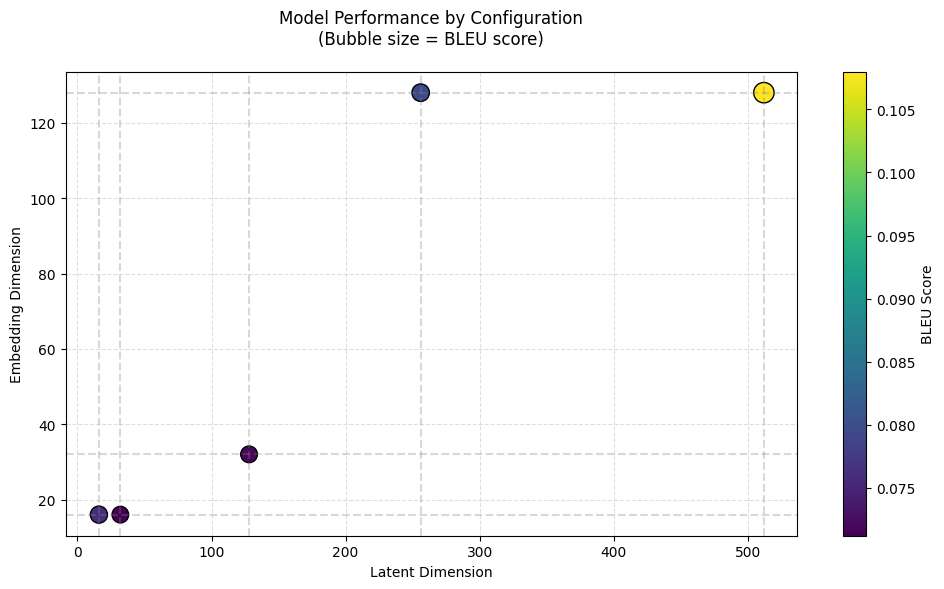

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
latent_dims = [512, 256, 128, 32, 16]
embedding_dims = [128, 128, 32, 16, 16]
bleu_scores = [0.1080, 0.0793, 0.0720, 0.0712,0.0759]

# Scale BLEU scores for bubble sizes
bubble_sizes = np.array(bleu_scores) * 2000

plt.figure(figsize=(10, 6))

# Create scatter plot with sized bubbles
scatter = plt.scatter(
    x=latent_dims,
    y=embedding_dims,
    s=bubble_sizes,
    c=bleu_scores,
    cmap='viridis',
    edgecolors='black'
)

# Add labels and title
plt.axvline(x=512, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axvline(x=256, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axvline(x=128, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axvline(x=32, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axvline(x=16, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axhline(y= 128, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axhline(y=  32, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.axhline(y= 16, color='gray', linestyle='--', alpha=0.3, zorder=1)
plt.xlabel('Latent Dimension')
plt.ylabel('Embedding Dimension')
plt.title('Model Performance by Configuration\n(Bubble size = BLEU score)', pad=20)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('BLEU Score')



# Customize grid
plt.grid(True, which='both', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()